## PROYECT STADISTICS 
### CARLOS EDUARDO ORTEGA CLEMENT
#### A01707480

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df_data = pd.read_csv('dataus2023.csv')

df_data.shape

df_data.head(20)
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

In [3]:
df_data['qdate'] = pd.PeriodIndex(df_data.q,freq="q")


In [4]:
df_firms = pd.read_csv('firmsus2023.csv')

df_firms.shape

df_firms.head()

,empresa,Nombre,status,partind,naics1,naics2,SectorEconomatica
0,A,"Agilent Technologies, Inc",activo,0.10,Industrias manufactureras,"Fabricación de instrumentos de medición, contr...",Electroelectronic
1,AA,Alcoa Corp,activo,NaN,Industrias manufactureras,Industria básica del aluminio,Siderur & Metalur
2,AABA_old,Altaba Inc,cancelado,NaN,"Servicios profesionales, científicos y técnicos",Servicios de diseño de sistemas de cómputo y s...,Software y Datos
3,AAC_old,Aac Hldg Inc,cancelado,NaN,Servicios de salud y de asistencia social,Otros consultorios para el cuidado de la salud,Otros
4,AAIC,Arlington Asset Investment Corp,activo,NaN,Servicios financieros y de seguros,Otros fondos,Fondos


In [6]:
df_firms1 = df_firms[["empresa","Nombre","status","naics1"]]
df_firms1.columns= ["firm","Nombre","status","industria"]

df_firms1
data = pd.merge(df_data, df_firms1, on="firm", how = "left")

data.head()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year,qdate,Nombre,status,industria
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,63.33,104.00,452000.00,NaN,2000,2000Q1,"Agilent Technologies, Inc",activo,Industrias manufactureras
1,A,2000q2,6.00,4731000.00,2421000.00,1925000.00,73000.00,0.00,0.00,161000.00,...,0.00,44.91,73.75,452271.97,1453000.00,2000,2000Q2,"Agilent Technologies, Inc",activo,Industrias manufactureras
2,A,2000q3,9.00,7401000.00,3790000.00,3016000.00,101000.00,0.00,0.00,244000.00,...,0.00,29.80,48.94,453014.58,1581000.00,2000,2000Q3,"Agilent Technologies, Inc",activo,Industrias manufactureras
3,A,2000q4,12.00,10773000.00,5522000.00,4198000.00,111000.00,0.00,0.00,407000.00,...,0.00,33.34,54.75,456366.38,1741000.00,2000,2000Q4,"Agilent Technologies, Inc",activo,Industrias manufactureras
4,A,2001q1,3.00,2841000.00,1449000.00,1113000.00,19000.00,-25000.00,0.00,119000.00,...,0.00,18.71,30.73,456769.74,1821000.00,2001,2001Q1,"Agilent Technologies, Inc",activo,Industrias manufactureras


In [7]:
data.set_index(['firm','qdate'],inplace = True)

#data

In [8]:
#Calculate log quarterly returns (rq) and log annual returns (ry).


data['ry'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(4))
data['rq'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(1))

data['ebit'] = data['revenue'] - data['cogs'] - data['sgae']
data['f1rq'] = data['rq'].shift(-1)
data['opm'] = np.where(data['revenue'] == 0, np.NaN, data['ebit'] / data['revenue'])
data['netincome'] = data['ebit'] + data['otherincome'] + data['extraordinaryitems'] - data['finexp'] - data['incometax']
data['pm'] = np.where(data['revenue'] == 0, np.NaN, data['netincome'] / data['revenue'])
data['ato'] = np.where(data['totalassets'] == 0, np.NaN, data['revenue'] / data['totalassets'])
data['acidratio'] = np.where(data['currentliabilities']==0,np.NaN,data['currentassets'] / data['currentliabilities'])
data['finlev'] = np.where(data['totalassets'] == 0, np.NaN, data['longdebt'] / data['totalassets'])
data['mvalue'] = data['originalprice'] * data['sharesoutstanding']
data['bookvalue'] = data['totalassets'] - data['totalliabilities']

### 1.2 FIRM COMPOSITION OF THE US FINANCIAL MARKET

#### Show how many active firms by industry there are in the sample

In [9]:
data_year = data[(data['q']=='2023q2')&(data['status']=='activo')]

industry_des= data_year.reset_index().groupby(['industria'])[['firm']].count()

industry_descript= data_year.reset_index().groupby(['industria'])[['firm','mvalue','bookvalue']].describe()



industry_descript

mvalue               
                                                     count        mean   
industria                                                                
-                                                     1.00  5231091.58  \
Agricultura, ganadería, aprovechamiento foresta...   17.00  7682534.32   
Comercio al por mayor                                77.00  6028485.16   
Comercio al por menor                               143.00 24720931.28   
Construcción                                         46.00  5996741.18   
Empresas de electricidad, gas y agua                 77.00 15446636.74   
Industrias manufactureras                          1476.00 12901394.10   
Información en medios masivos                       252.00 23394300.99   
Minería, explotación de canteras y extracción d...  111.00  6854571.01   
Otros servicios excepto actividades gubernament...   17.00  1956203.54   
Servicios de alojamiento temporal y de preparac...   68.00 11295843.16   
Servicios de apoyo a los negocios y manejo de r...  124.00 17371968.89   
Servicios de esparcimiento culturales y deporti...   22.00 12835059.39   
Servicios de salud y de asistencia social            59.00  4637460.89   
Servicios educativos                                 13.00  1285681.43   
Servicios financieros y de seguros                  665.00  9689768.58   
Servicios inmobiliarios y de alquiler de bienes...   68.00  5433897.26   
Servicios profesionales, científicos y técnicos     136.00 21053135.18   
Transportes, correos y almacenamiento                68.00 13453965.87   

                                                                             
                                                            std        min   
industria                                                                    
-                                                           NaN 5231091.58  \
Agricultura, ganadería, aprovechamiento foresta...  14397123.37    3687.58   
Comercio al por mayor                               10642022.44    5458.41   
Comercio al por menor                              121550124.58    3795.68   
Construcción                                         9146811.86    2212.28   
Empresas de electricidad, gas y agua                22382680.55   33728.24   
Industrias manufactureras                           92950197.93     796.17   
Información en medios masivos                      162797729.32    3256.72   
Minería, explotación de canteras y extracción d...  14342726.25      34.17   
Otros servicios excepto actividades gubernament...   2540950.91   16742.10   
Servicios de alojamiento temporal y de preparac...  31192997.20    9806.64   
Servicios de apoyo a los negocios y manejo de r...  55155038.37    2802.16   
Servicios de esparcimiento culturales y deporti...  34259381.87    3092.33   
Servicios de salud y de asistencia social           11362896.51     717.42   
Servicios educativos                                  981126.57   83986.36   
Servicios financieros y de seguros                  41974456.13    5559.04   
Servicios inmobiliarios y de alquiler de bienes...  23978234.61    3440.61   
Servicios profesionales, científicos y técnicos    144062939.05    3638.32   
Transportes, correos y almacenamiento               26713061.01   29816.46   

                                                                           
                                                          25%        50%   
industria                                                                  
-                                                  5231091.58 5231091.58  \
Agricultura, ganadería, aprovechamiento foresta...  193628.11  857921.50   
Comercio al por mayor                               248606.04 1450954.00   
Comercio al por menor                               230895.58 1662158.77   
Construcción                                        890688.95 2559768.80   
Empresas de electricidad, gas y agua               2860884.20 5192340.89   
Industrias manufacture

DE ESTA TABLA PODEMOS OBSERVAR QUE DE MI INDUSTRIA MANUFACTURERA EXISTEN 1476 FIRMAS ACTIVAS DONDE EL VALOR TIPICO DE
MARKET VALUE ES DE 684326 MIL DOLARES Y EL VALOR MINIMO ES DE 796 MIL DOLARES. Y PARA EL BOOK VALUE EL VALOR TIPIDO DE LA FIRMA ES DE
277638 MIL DOLARES Y EL MINIMO ES DE -15493000.00 MIL DOLARES

### For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed? You have to do the right descriptive statistics

PARA ESTE ANÁLISIS PRIMERO HAY QUE CONSIDERAR QUE ESTAMOS ANALIZANDO VALORES DE FIRMAS COMPLETAMENTE DISTINTAS, LAS CUALES TIENEN VALORES MUY DIVERSOS. ES POR ESO QUE DECIDÍ VISUALIZAR TANTO LA MEDIA COMO LA MEDIANA PARA VER SI DIFIEREN MUCHO. 

OBTUVE LOS VALORES AGRUPANDO LOS DATOS POR INDUSTRIA PARA TENER UNA MEJOR DESCRIPCION ESTADISTICA DEL MARKET VALUE Y BOOK VALUE POR INDUSTRIA.

In [10]:

industry_des['mean_mvalue']= data_year.reset_index().groupby(['industria'])[['mvalue']].mean()
industry_des['median_mvalue']= data_year.reset_index().groupby(['industria'])[['mvalue']].median()


industry_des.describe()

,firm,mean_mvalue,median_mvalue
count,19.00,19.00,19.00
mean,186.95,10908930.03,1992096.05
std,361.08,6979393.28,1342595.98
min,2.00,1285681.43,684326.81
25%,35.00,5715319.22,1095913.98
50%,71.00,9689768.58,1497541.37
75%,132.50,14450301.30,2637227.13
max,1540.00,24720931.28,5231091.58


VAMOS A VISUALIZAR LOS RESULTADOS DE DICHOS CÁLCULOS CON UN PLOT. PRIMERO VAMOS COMPARAR LA MEDIA CON LA MEDIANA DEL MARKET VALUE POR INDUSTRIA

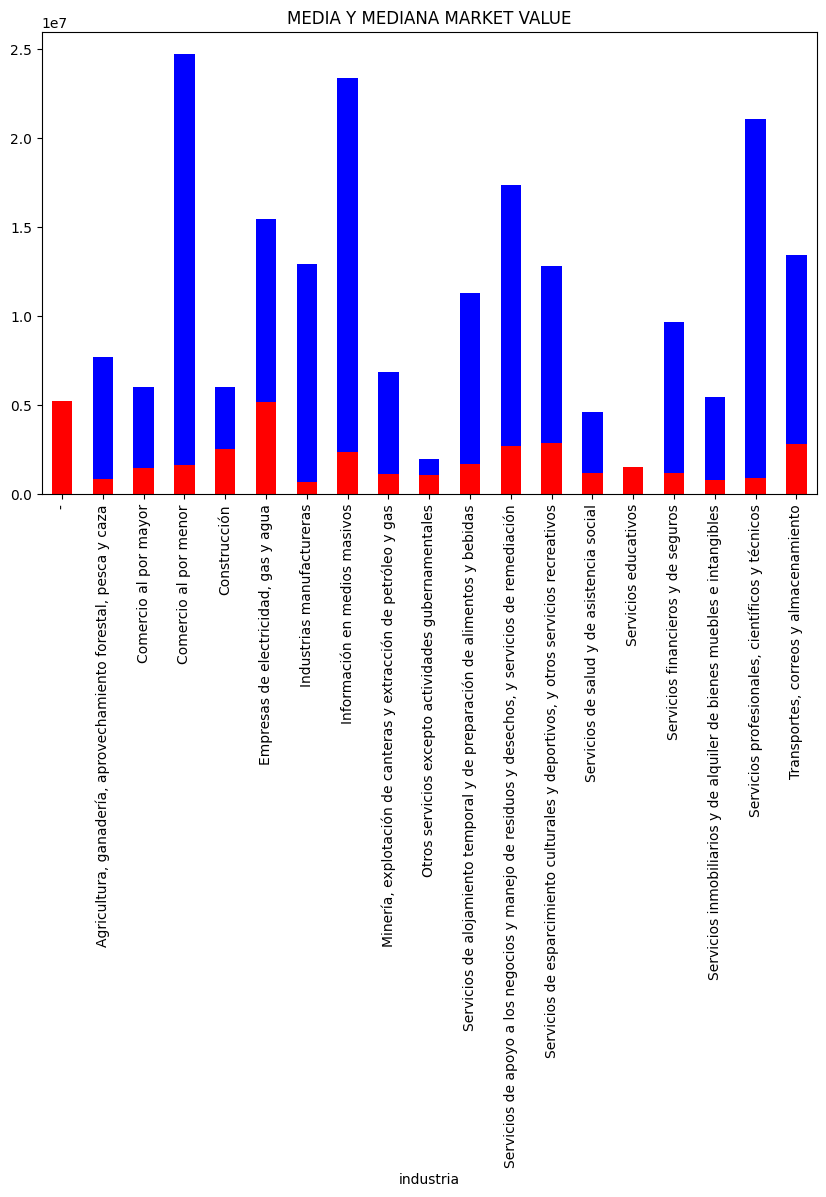

In [11]:
#REALIZAMOS UNA VISUALIZACION DE LA MEDIA Y MEDIANA DEL MARKET VALUE

plt.figure(figsize=(10, 6))
industry_des['mean_mvalue'].plot(kind='bar', color='blue')
industry_des['median_mvalue'].plot(kind='bar',color='red')

plt.title("MEDIA Y MEDIANA MARKET VALUE")
# Mostrar el gráfico
plt.show()


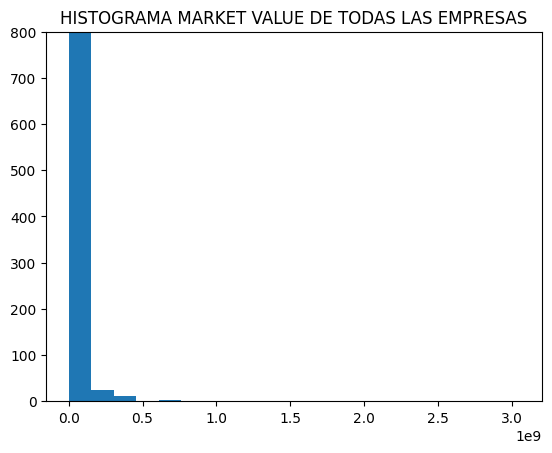

In [12]:
#HISTOGRAMA DEL MARKET VALUE

# REDUJE EL LIMITE EN Y PARA VER EL COMPORTAMIENTO MÁS CLARO Y VER LA TENENCIA A LA IZQUIERDA
plt.hist(data_year['mvalue'],bins=20)
plt.title("HISTOGRAMA MARKET VALUE DE TODAS LAS EMPRESAS")
plt.ylim(0,800)
plt.show()

DESPUÉS DE ANALIZAR EL GRÁFICO PODEMOS OBSERVAR QUE LA MEDIA DIFIERE MUCHO DE LA MEDIANA, ESTO QUIERE DECIR QUE NO TIENE UNA DISTRIBUCIÓN NORMAL. DE IGUAL FORMA, AL REALIZAR UN HISTOGRAMA DE TODOS LOS VALORES DE MVALUE, PODEMOS VER QUE TIENE UNA TENDENCIA A LA IZQUIERDA, ESTO QUIERE DECIR QUE CASI TODAS LAS EMPRESAS TIENEN VALORES MUY BAJOS Y QUE SOLO MUY POCAS EMPRESAS TIENEN VALORES ALTOS.

ES POR ESTO QUE EL MEJOR PARÁMETRO PARA TOMAR EN CUENTA ES LA MEDIANA YA QUE AL SER TAN DIFERENTE LA MEDIA QUIERE DECIR QUE TIENE VALORES MUY EXTREMOS. UNA CONCLUSIÓN ES QUE DENTRO DE CADA INDUSTRIA EXISTEN EMPRESAS QUE TIENEN UN VALOR DE MERCADO MUY POR ENCIMA QUE OTRAS EMPRESAS Y QUE LA MEJOR FORMA DE REPRESENTAR EL VALOR TÍPICO DE LAS FIRMAS DE CADA INDUSTRIA ES LA MEDIANA.

ANALIZANDO LA MEDIANA DE LAS FIRMAS DE CADA INDUSTRIA PODEMOS DECIR QUE PARA EL AÑO 2023 EN EL ULTIMO PERIODO, LAS FIRMAS DE LAS EMPRESAS DE ELECTRICIDAD, AGUA Y GAS TIENEN EL VALOR TÍPICO MAS ALTO DE MARKET VALUE. Y LA INDUSTRIA QUE MENOS VALOR TIENE ES LA INDUSTRIA MANUFACTURERA.

LAS DEMÁS INDUSTRIAS TIENEN VALORES PARECIDOS, PARA VER CUAL ES EL VALOR TÍPICO DE TODAS LAS INDUSTRIAS SACAREMOS LA MEDIANA DE TODAS LAS FIRMAS Y TODAS LAS INDUSTRIAS DEL MARKET VALUE

In [13]:
median_global_mvalue = data_year['mvalue'].median()
print("mediana : ",median_global_mvalue)

mean_global_mvalue = data_year['mvalue'].mean()
print("media: ",mean_global_mvalue)

mediana :  1170074.0124050002
media:  13203061.114949102


In [14]:
data_year['mvalue'].describe()

count         3440.00
mean      13203061.11
std       87264636.94
min             34.17
25%         195521.48
50%        1170074.01
75%        5161019.78
max     3050896326.94
Name: mvalue, dtype: float64

COMPARANDO DE FORMA GLOBAL TODAS LAS FIRMAS, PODEMOS DECIR QUE EL VALOR TÍPICO DEL MARKET VALUE DE TODAS LAS FIRMAS EN EL ULTIMO PERIODO ES DE 1170074 Y QUE EL 50% DE ELLAS RONDAN ENTRE 195521 Y 5161019. TAMBIEN ANALIZANDO LA DESVIACION ESTANDAR, PODEMOS VER QUE ES MUCHO MAS GRANDE QUE LA MISMA MEDIANA, ESTO ES POR LA DIFERENCIA CON  LAS EMPRESAS MAS GRANDES DEL MERCADO. POR ESO NO PODEMOS CONFIAR EN EL RESULTADO DE LA STD O UTILIZARLO COMO VARIABLE DE ANALISIS

#### HACEMOS EL  MISMO ANÁLISIS PARA LA PARTE DE BOOK VALUE

In [16]:

#Realizamos los calculos para  book value por industria

industry_des['mean_bvalue']= data_year.reset_index().groupby(['industria'])[['bookvalue']].mean()
industry_des['median_bvalue']= data_year.reset_index().groupby(['industria'])[['bookvalue']].median()

industry_des[['mean_bvalue','median_bvalue']]

,mean_bvalue,median_bvalue
industria,,
-,5948964.00,5948964.00
"Agricultura, ganadería, aprovechamiento forestal, pesca y caza",1326739.50,724592.00
Comercio al por mayor,1689149.55,883300.00
Comercio al por menor,3691997.32,544340.00
Construcción,2934480.25,1190225.00
"Empresas de electricidad, gas y agua",8103910.74,3332000.00
Industrias manufactureras,2624805.61,277638.00
Información en medios masivos,4331265.41,507965.00
"Minería, explotación de canteras y extracción de petróleo y gas",3522102.51,998560.50


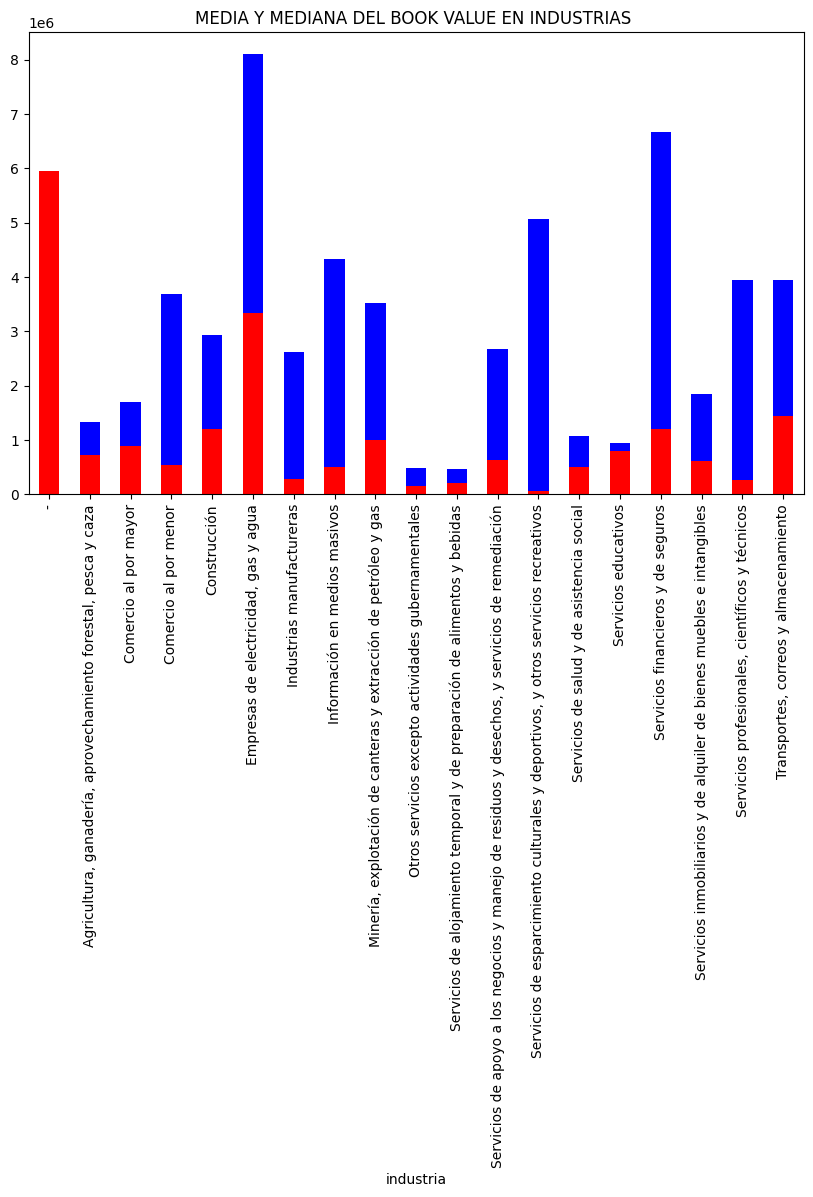

In [17]:
#REALIZAMOS UNA VISUALIZACION DE LA MEDIA Y MEDIANA DEL BOOKVALUE PRO INDUSTRIA

plt.figure(figsize=(10, 6))

industry_des['mean_bvalue'].plot(kind='bar', color='blue')
industry_des['median_bvalue'].plot(kind='bar',color='red')
plt.title("MEDIA Y MEDIANA DEL BOOK VALUE EN INDUSTRIAS ")

# Mostrar el gráfico
plt.show()

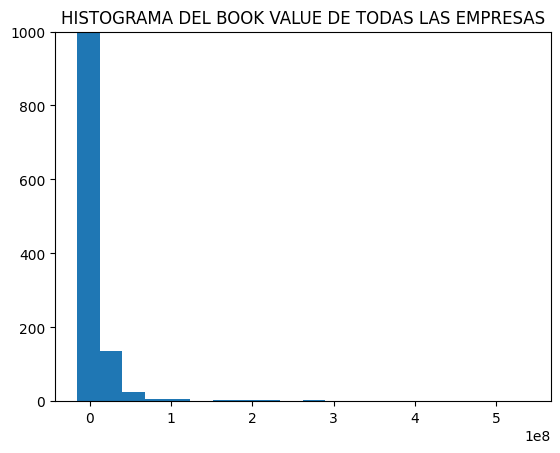

In [18]:
#HISTOGRAMA DEL BOOK VALUE

# REDUJE EL LIMITE EN Y PARA VER EL COMPORTAMIENTO MÁS CLARO Y VER LA TENENCIA A LA IZQUIERDA

plt.hist(data_year['bookvalue'],bins=20)
plt.title("HISTOGRAMA DEL BOOK VALUE DE TODAS LAS EMPRESAS")
plt.ylim(0,1000)
plt.show()

In [19]:
data_year['bookvalue'].describe()

count        3328.00
mean      3698973.10
std      17433799.21
min     -15493000.00
25%        103453.84
50%        500654.50
75%       1986798.75
max     539883000.00
Name: bookvalue, dtype: float64

In [20]:
print("Firmas con book value negativo: ",data_year['bookvalue'][data_year['bookvalue']<0].count())

Firmas con book value negativo:  214


AL IGUAL QUE LA VARIABLE MARKET VALUE, AQUI PODEMOS OBSERVAR QUE PARA BOOK VALUE NO EXISTE UNA DISTRIBUCION NORMALIZADA, LA MEDIA DIFIERE MUCHO DE LA MEDIANA Y QUE EXISTE UNA TENDENCIA A LA IZQUIERDA, YA QUE MUY POCAS EMPRESAS TIENEN UN BOOK VALUE GRANDE.

AQUÍ EXISTE UNA DIFERENCIA CON LA OTRA VARIABLE Y ES QUE TIENE VALORES NEGATIVOS Y EN EL HISTOGRAMA SE VE CÓMO ALGUNAS DE LAS EMPRESAS HASTA TIENEN VALORES NEGATIVOS, EXACTAMENTE 214 firmas

IGUAL QUE LA VARIABLE DE MARKET VALUE, AQUI LA INDUSTRIA CON EL BOOK VALUE MAS GRANDE ES LA DE SERVICIOS DE AGUA, ELECTICIDAD Y LUZ. MIENTRAS QUE LA DE MENOR VALOR ES LA DE SERVICIOS DE ESPARCIMIENTO CULTURAL.

EL VALOR TIPICO DE BOOK VALUE EN LAS FIRMAS ES DE 500654 MIL DOLARES 

#### Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

In [22]:
big_firms = data_year.groupby(['firm'])[['mvalue']].max()
                                        
b = big_firms.nlargest(10,'mvalue')

b

,mvalue
firm,
AAPL,3050896326.94
MSFT,2532080938.79
GOOGL,1519830900.00
AMZN,1337539706.77
NVDA,1044859400.00
TSLA,829681140.87
BRK_A,750735436.68
META,735452839.12
UNH,447491234.90


<Figure size 1000x600 with 0 Axes>

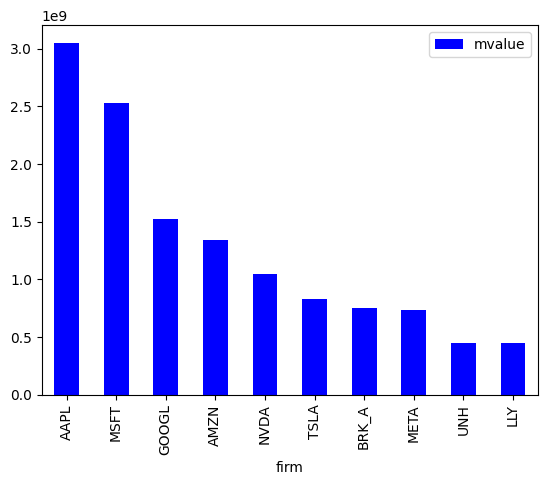

In [23]:
plt.figure(figsize=(10, 6))
b.plot(kind='bar', color='blue')

# Mostrar el gráfico
plt.show()

AQUI PODEMOS OBSERVAR LAS 10 EMPRESAS MAS GRANDES DE US Y PARA CHECAR CUANTO DIFIEREN DEL VALOR TIPICO DE TODAS LAS EMPRESAS TENEMOS QUE SACAR LA DIFERENCIA ENTRE LAS MEDIANAS

In [24]:

allfirms_median = data_year[['mvalue']].median()


diff = b.median()-allfirms_median


print("diferencia",diff)

diferencia mvalue   936100196.42
dtype: float64


PODEMOS OBSERVAR QUE LA DIFERENCIA ES GRANDISIMA ENTRE LAS 10 MEJORES EMPRESAS CONTRA EL RESTO EN MARKET VALUE, CON UN VALOR DE 936100196

#### Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

In [25]:
big_firms = data_year.groupby(['firm'])[['bookvalue']].max()
                                        
b = big_firms.nlargest(10,'bookvalue')



<Figure size 1000x600 with 0 Axes>

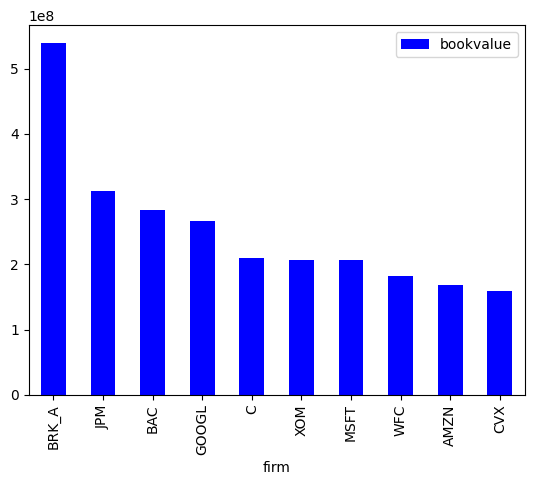

In [26]:
plt.figure(figsize=(10, 6))
b.plot(kind='bar', color='blue')

# Mostrar el gráfico
plt.show()

CON BOOK VALUE PODEMOS OBSERVAR QUE SON OTRAS EMPRESAS DISNTINTAS AL MARKET VALUE Y QUE EL PRIMER PUESTO GANA CON MUCHA DIFERENCIA LAS 9 RESTANTES. 

PARA LA DIFERENCIA ENTRE EL VALOR TIPICO DE LAS 10 MAS GRANDES EMPRESAS EN BOOKVALUE Y EL RESTO, PODEMOS NOTAR QUE NO HAY TANTA DIFERENCIA COMO EN LA DEL MARKET VALUE

In [27]:

allfirms_median = data[['bookvalue']].median()


diff = b.median()-allfirms_median


print(diff)

bookvalue   207668742.00
dtype: float64


### 1.3 Evolution of the US financial market

#### Considering the whole history of financial data for all firms, and only annual fiscal information (selecting fiscalmonth=12) :How the total market value of the US market has changed over the years? Do a table and/or graph and explain

In [28]:

# Filtrar los datos para incluir solo registros con fiscalmonth=12 y empresas de EE. UU.
ydata = data[data['fiscalmonth'] == 12]


market_value_all_year = ydata.groupby(['year'])['mvalue'].sum()


Text(0.5, 1.0, 'market value all years')

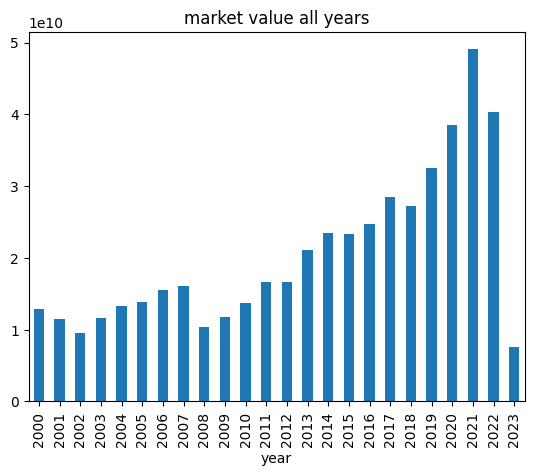

In [29]:
market_value_all_year.plot(kind='bar')

plt.title("market value all years")

AQUI PODEMOS OBSERVAR COMO SE HA COMPORTADO EL MARKET VALUE DE TODAS LAS EMPRESAS A LO LARGO DE LOS AÑOS. SE VE CLARAMENTE QUE HA HABIDO UN CRECIMIENTO POSITIVO CONTINUO. DONDE SE PUEDE NOTAR QUE HUBO UNA CAIDA ES EN EL AÑO 2007 A 2008 Y EN EL AÑO 2021 A 2022. DE AHI EN FUERA, SOLAMENTE HAN HABIDO CAIDAS MUY PEQUEÑAS PERO GENERALMENTE SIEMPRE SUBEN. EL AÑO 2023 SE VE BAJO PERO ES PORQUE NO TENEMOS TODO LOS DATOS DEL AÑO COMPLETO.

#### How total revenue and total net income of all US firms has changed over the years? Do a table and/or graph and explain

In [30]:
revenue_all_year = ydata.groupby(['year'])['revenue'].sum()
netincome_all_year = ydata.groupby(['year'])['netincome'].sum()


Text(0.5, 1.0, 'revenue all years')

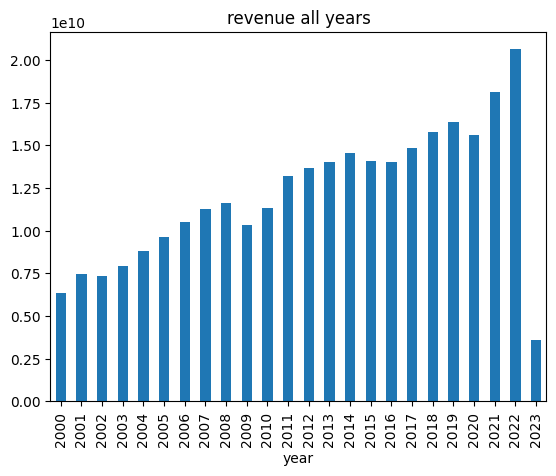

In [31]:
revenue_all_year.plot(kind='bar')
plt.title("revenue all years")

EN LA GRAFICA DE L REVENUE A LO LARGO DE LOS AÑOS MUESTRA UN CRECIMIENTO PERO A DIFERENCIA DEL MARKET VALUE, TIENE UN POCO DE CURVATURA EL CUAL SIGUE UN PATRON.

Text(0.5, 1.0, 'netincome all years')

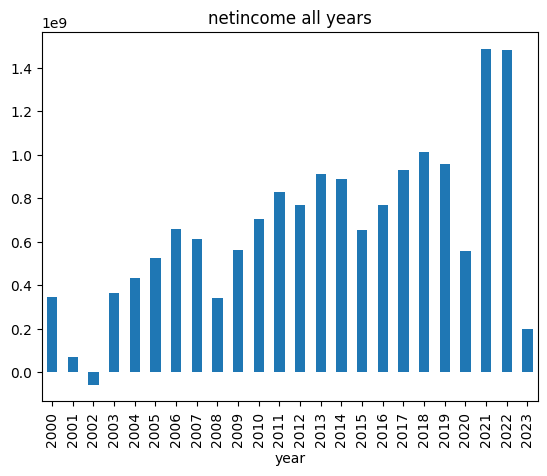

In [32]:
netincome_all_year.plot(kind='bar')
plt.title("netincome all years")

PARA EL NETINCOME SE PUEDE NOTAR UN PATRON DONDE CADA CIERTO TIEMPO EXISTE UNA BAJADA PARA POSTERIORMENTE VOLVER A SUBIR. COMO UN PATRON. 

SIN EMBARGO, DESPUES DEL AÑO 2020 EXISTE UN COMPORTAMIENTO QUE SE SALE MUCHO DEL PATRON YA QUE EXISTE UNA SUBIDA MUY EXTREMA EL CUAL FUE EN RECUPERACION DE PANDEMIA

### 1.4.1 Descriptive statistics for your industry


#### Using the subsample of your industry and using annual fiscal information (selecting rows with fiscalmonth=12), and the most recent complete year (2022), do the following:

In [34]:
my_industry_data = data.loc[(data['fiscalmonth'] == 12) & (data['industria']== 'Industrias manufactureras')&(data['year']==2022)&(data['status']=="activo")]



#### Show descriptive statistics for future quarterly log return, annual return, total assets, revenue, netincome and all financial ratios calculated above. Provide a clear interpretation of the descriptive statistics of revenue and 1 financial ratio

In [35]:
my_industry_data[['rq','ry','revenue','netincome','mvalue','bookvalue','opm','pm','ato','finlev','acidratio']].describe()

,rq,ry,revenue,netincome,mvalue,bookvalue,opm,pm,ato,finlev,acidratio
count,1447.00,1416.00,1472.00,1469.00,1453.00,1472.00,1252.00,1252.00,1472.00,1472.00,1469.00
mean,-0.08,-0.56,4792123.98,510356.30,11463216.11,2474280.71,-18.03,-18.12,0.61,0.21,5.03
std,0.41,0.78,21497239.45,3622327.89,70614774.38,10206152.98,153.31,154.86,0.66,0.24,6.39
min,-2.57,-4.45,-418.00,-6752000.00,1845.47,-15848000.00,-3895.75,-3857.75,-0.01,0.00,0.02
25%,-0.25,-0.93,8607.00,-60806.00,84561.57,45494.25,-0.90,-0.91,0.09,0.03,1.72
50%,-0.03,-0.38,253255.55,-8224.13,661215.26,256642.00,0.02,0.01,0.54,0.15,2.73
75%,0.15,-0.04,2082658.50,127672.00,3382234.75,1040550.00,0.12,0.09,0.91,0.31,5.66
max,2.66,1.39,413680000.00,99803000.00,2220977926.40,202473000.00,134.87,128.40,13.56,2.76,67.02


In [36]:
my_industry_data[['revenue','pm']].describe()

,revenue,pm
count,1472.00,1252.00
mean,4792123.98,-18.12
std,21497239.45,154.86
min,-418.00,-3857.75
25%,8607.00,-0.91
50%,253255.55,0.01
75%,2082658.50,0.09
max,413680000.00,128.40


ESCOGI ANALIZAR EL REVENUE Y EL PM. PODEMOS OBSERVAR QUE PARA LAS EMPRESAS DEL 2022 DE LA INDUSTRIA MANUFACTURERA EL VALOR TIPICO DE REVENUE ES DE 253255 MIL DOLARES Y EL 50% DE LAS EMPRESAS ESTAN EN UN RANGO DE 8607 Y 2082658 MIL DOLARES DE RETORNO ANUAL. TAMBIEN OBSERVAMOS QUE EXISTEN EMPRESAS CON HASTA -418 MIL DOLARES DE REVENUE.

DE IGUAL FORMA EL VALOR TIPICO DE PM ES DE 0.01 Y QUE EL 50% DE LAS EMPRESAS DEL 2022 DE LA INDUSTRIA MANUFACTURERA ESTAN ENTRE -0.91 Y 0.09 DE PM. 

#### Show a correlation matrix with the same variables you used for descriptive statistics above, but in the case of totalassets, revenue and netincome, use the logarithmic transformation of their values.

In [37]:


my_industry_datay = data.loc[(data['fiscalmonth'] == 12) & (data['industria']== 'Industrias manufactureras')&(data['status']=="activo")]


my_industry_datay.head()


q  fiscalmonth     revenue       cogs       sgae   
firm qdate                                                           
A    2000Q4  2000q4        12.00 10773000.00 5522000.00 4198000.00  \
     2001Q4  2001q4        12.00  8396000.00 5166000.00 4008000.00   
     2002Q4  2002q4        12.00  6010000.00 3694000.00 3923000.00   
     2003Q4  2003q4        12.00  6056000.00 3762000.00 3019000.00   
     2004Q4  2004q4        12.00  7181000.00 4058000.00 2737000.00   

             otherincome  extraordinaryitems  finexp  incometax  totalassets   
firm qdate                                                                     
A    2000Q4    111000.00                0.00    0.00  407000.00   8425000.00  \
     2001Q4    301000.00           580000.00    0.00  -71000.00   7986000.00   
     2002Q4     60000.00           -10000.00    0.00 -525000.00   8203000.00   
     2003Q4     35000.00          -268000.00    0.00 1100000.00   6297000.00   
     2004Q4     54000.00                0.00    0.00   91000.00   7056000.00   

             ...        ebit  f1rq   opm   netincome    pm  ato  acidratio   
firm qdate   ...                                                             
A    2000Q4  ...  1053000.00 -0.58  0.10   757000.00  0.07 1.28       2.05  \
     2001Q4  ...  -778000.00  0.20 -0.09   174000.00  0.02 1.05       2.40   
     2002Q4  ... -1607000.00 -0.31 -0.27 -1032000.00 -0.17 0.73       2.24   
     2003Q4  ...  -725000.00  0.08 -0.12 -2058000.00 -0.34 0.96       2.04   
     2004Q4  ...   386000.00 -0.08  0.05   349000.00  0.05 1.02       2.45   

             finlev      mvalue  bookvalue  
firm qdate                                  
A    2000Q4    0.00 24986059.36 5265000.00  
     2001Q4    0.00 13219949.12 5659000.00  
     2002Q4    0.14  8387758.60 4627000.00  
     2003Q4    0.18 13922599.19 2824000.00  
     2004Q4    0.16 11732870.20 3569000.00  

[5 rows x 35 columns]

In [38]:
my_industry_datay['log_totalassets'] = np.where(my_industry_datay['totalassets']==0,np.NaN,np.log(my_industry_datay['totalassets']))
my_industry_datay['log_revenue'] = np.where(my_industry_datay['revenue']==0,np.NaN,np.log(my_industry_datay['revenue']))
my_industry_datay['log_netincome'] = np.where(my_industry_datay['netincome']==0,np.NaN,np.log(my_industry_datay['netincome']))
my_industry_datay['log_mvalue'] = np.where(my_industry_datay['mvalue']==0,np.NaN,np.log(my_industry_datay['mvalue']))

C:\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Litos\AppData\Local\Temp\ipykernel_6284\3237394647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_industry_datay['log_totalassets'] = np.where(my_industry_datay['totalassets']==0,np.NaN,np.log(my_industry_datay['totalassets']))
C:\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)

In [40]:
correlation_matrix = my_industry_datay[['rq','ry', 'f1rq', 'log_totalassets', 'log_revenue', 'log_netincome', 'pm', 'ato', 'acidratio', 'finlev','log_mvalue']].corr()


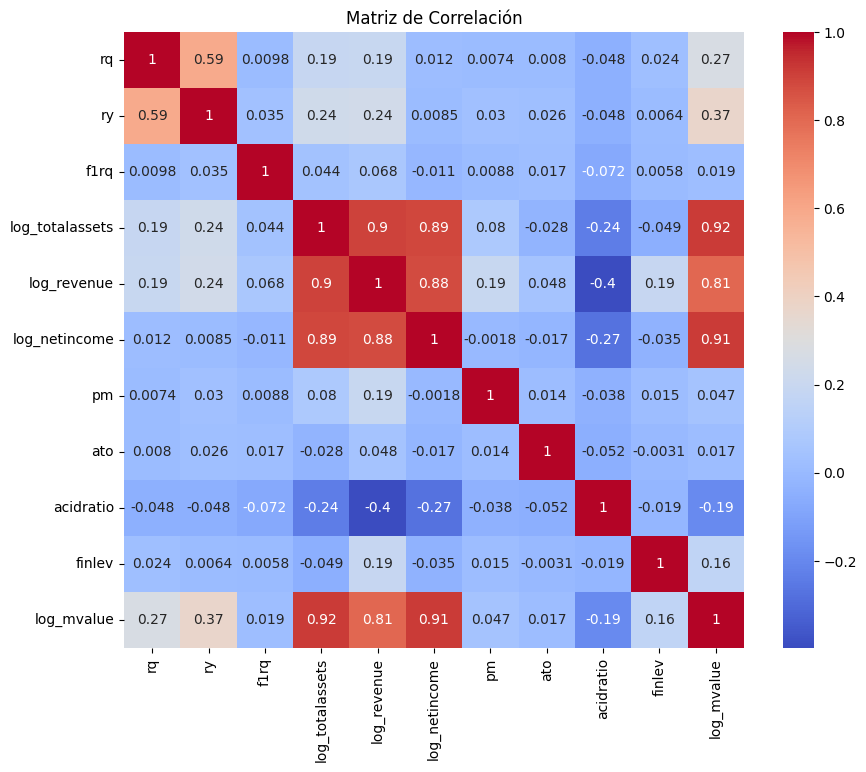

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear un mapa de calor (heatmap) de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Añadir título
plt.title('Matriz de Correlación')

# Mostrar el mapa de calor
plt.show()


#### Which variables have strongest and significant linear relationship with stock returns (annual and quarterly)? Explain

AL ANALIZAR LA MATRIZ DE CORRELACION PODEMOS VER QUE LAS VARIABLES MARKETVALUE, REVENUE Y TOTALASSETS SON LAS QUE MEJOR CORRELACION CON RESPECTO A LOS RETORNOS ANUALES Y POR TRIMESTRES, A COMPARACION DEL RESTO DE VARIABLES. 
LOS TOTAL ASSETS Y EL REVENUE TIENEN 19% DE PROBABILIDAD DE AUMENTAR SI LOS RETORNOS TRIMESTRALES AUMENTAN.

AL IGUAL LOS TOTAL ASSETS Y REVENUE TIENEN 24% DE PROBABILIDAD DE AMUENTAR SI LOS RETORNOS ANUALES AUMENTAN

Select 2-3 variables and 2-3 ratios with the strongest correlation with future log quarterly returns and do the following:

In [42]:
f1rq_c = my_industry_datay[['log_revenue','log_netincome','log_totalassets','acidratio','ato','rq','f1rq','log_mvalue']]


#### Do histograms for each factor/variables and interpret them



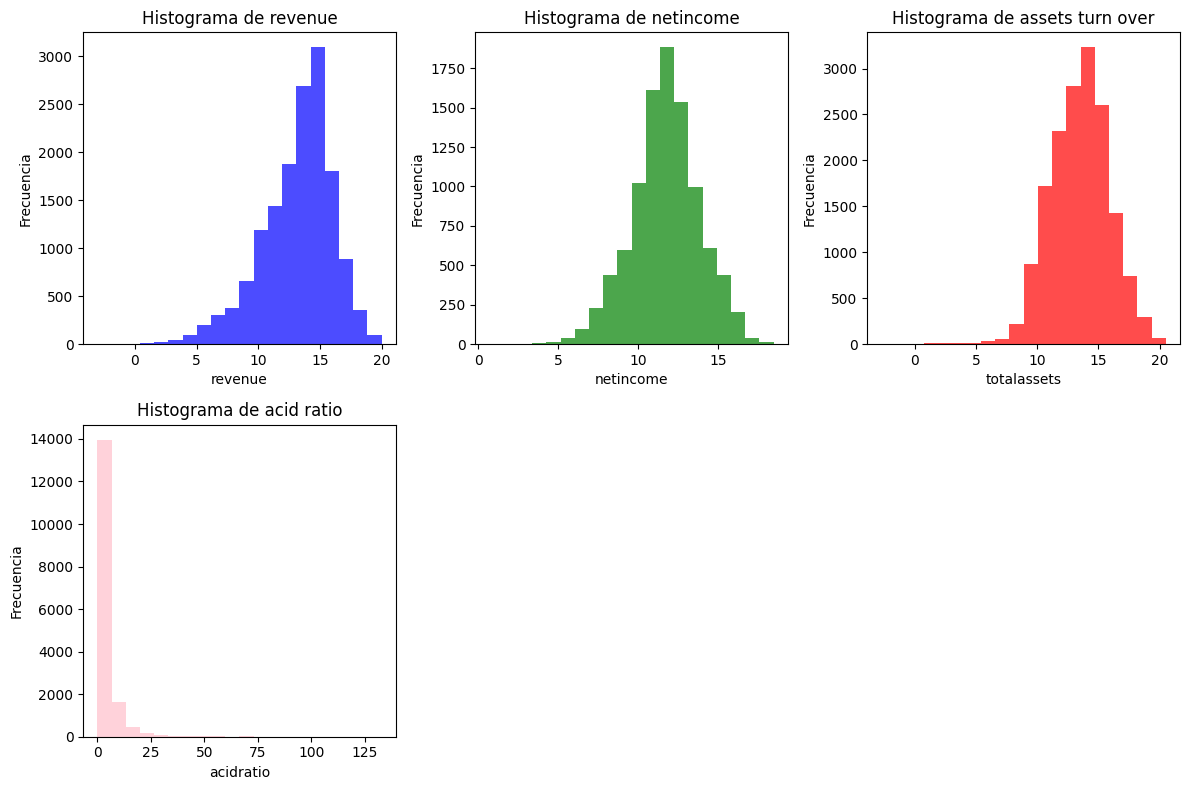

In [43]:


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Cambia el tamaño de la figura si es necesario

# Crear 6 subplots en una cuadrícula de 2 filas y 3 columnas
plt.subplot(2, 3, 1)
plt.hist(f1rq_c['log_revenue'], bins=20, color='blue', alpha=0.7)
plt.xlabel('revenue')
plt.ylabel('Frecuencia')
plt.title('Histograma de revenue')

plt.subplot(2, 3, 2)
plt.hist(f1rq_c['log_netincome'], bins=20, color='green', alpha=0.7)
plt.xlabel('netincome')
plt.ylabel('Frecuencia')
plt.title('Histograma de netincome')

plt.subplot(2, 3, 3)
plt.hist(f1rq_c['log_totalassets'], bins=20, color='red', alpha=0.7)
plt.xlabel('totalassets')
plt.ylabel('Frecuencia')
plt.title('Histograma de totalassets')


plt.title('Histograma de assets turn over')

plt.subplot(2, 3, 4)
plt.hist(f1rq_c['acidratio'], bins=20, color='pink', alpha=0.7)
plt.xlabel('acidratio')
plt.ylabel('Frecuencia')
plt.title('Histograma de acid ratio')

plt.tight_layout()
plt.show()



EN TODOS LOS HISTOGRAMAS QUE VARIABLES QUE NO SON RATIO PODEMOS OSBERVAR UNA DISTRIBUCION GAUSSEANA O UNA DISTRIBUCION NORMALIZADA, DONDE A SIMPLE VISTA SE PUEDE DETERMINAR FACIL QUE AL APLICAR EL LOGARITMO, SE REDUJO LA DESVIACION ESTANDAR, POR ENDE, LA VARIABILIDAD DE LOS DATOS SE REDUJO TAMBIEN, DONDE MAS DEL 65
% DE LOS DATOS SE ENCUENTRAN ENTRE UN VALOR DE 7 Y 15. 

#### Do plots to visualize the possible relationship each factor might have with quarterly returns (the dependent variable).



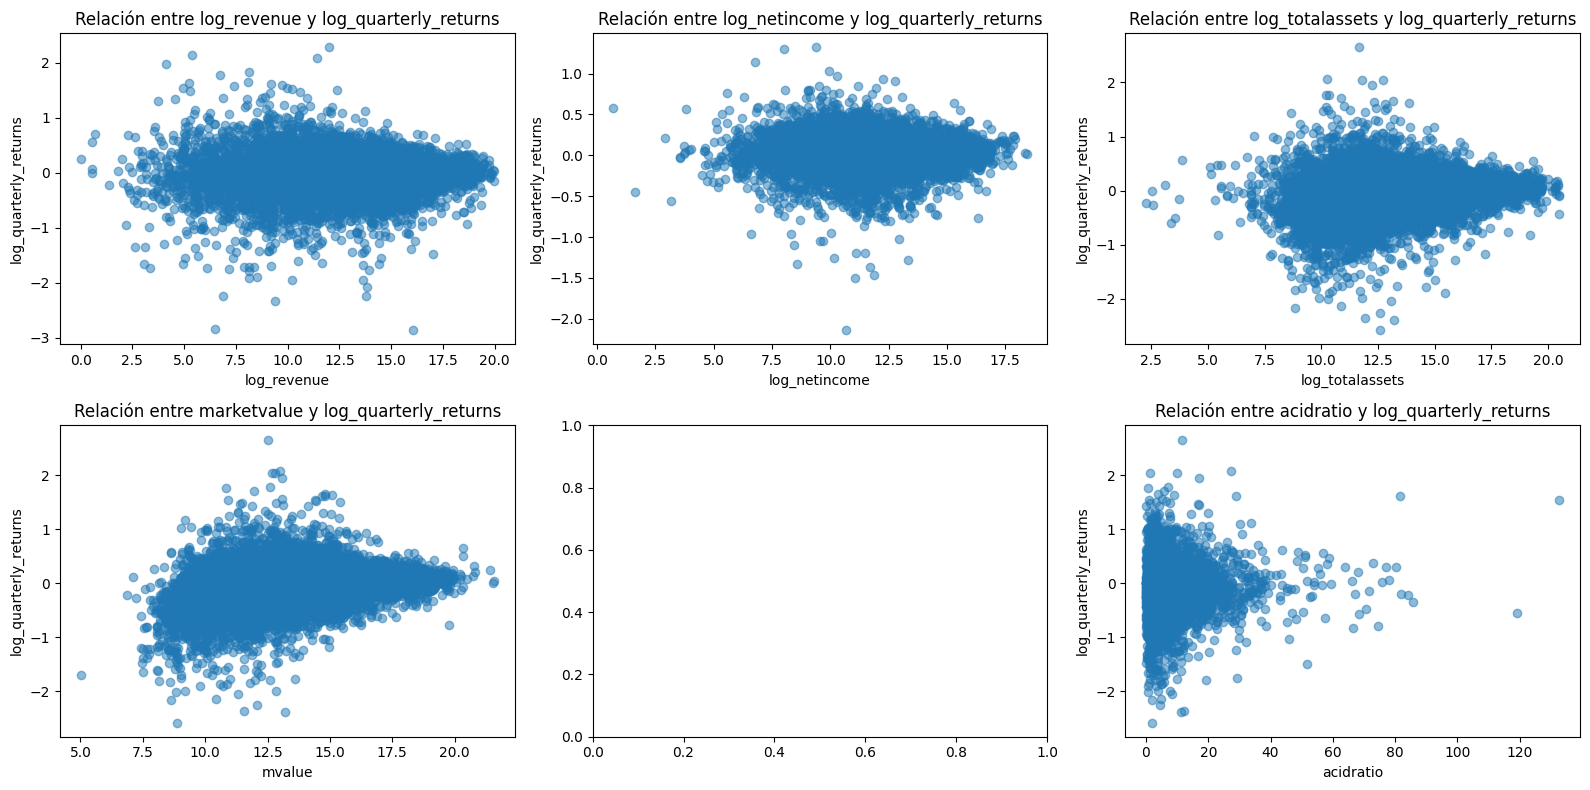

In [44]:
import matplotlib.pyplot as plt

# Crear una figura con múltiples subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

# Scatter plot para log_revenue vs. log_quarterly_returns
axes[0, 0].scatter(f1rq_c['log_revenue'], f1rq_c['f1rq'], alpha=0.5)
axes[0, 0].set_xlabel('log_revenue')
axes[0, 0].set_ylabel('log_quarterly_returns')
axes[0, 0].set_title('Relación entre log_revenue y log_quarterly_returns')

# Scatter plot para log_netincome vs. log_quarterly_returns
axes[0, 1].scatter(f1rq_c['log_netincome'], f1rq_c['rq'], alpha=0.5)
axes[0, 1].set_xlabel('log_netincome')
axes[0, 1].set_ylabel('log_quarterly_returns')
axes[0, 1].set_title('Relación entre log_netincome y log_quarterly_returns')

# Scatter plot para log_totalassets vs. log_quarterly_returns
axes[0, 2].scatter(f1rq_c['log_totalassets'], f1rq_c['rq'], alpha=0.5)
axes[0, 2].set_xlabel('log_totalassets')
axes[0, 2].set_ylabel('log_quarterly_returns')
axes[0, 2].set_title('Relación entre log_totalassets y log_quarterly_returns')

# Scatter plot para pm vs. log_quarterly_returns
axes[1, 0].scatter(f1rq_c['log_mvalue'], f1rq_c['rq'], alpha=0.5)
axes[1, 0].set_xlabel('mvalue')
axes[1, 0].set_ylabel('log_quarterly_returns')
axes[1, 0].set_title('Relación entre marketvalue y log_quarterly_returns')

# Scatter plot para acidratio vs. log_quarterly_returns
axes[1, 2].scatter(f1rq_c['acidratio'], f1rq_c['rq'], alpha=0.5)
axes[1, 2].set_xlabel('acidratio')
axes[1, 2].set_ylabel('log_quarterly_returns')
axes[1, 2].set_title('Relación entre acidratio y log_quarterly_returns')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


AL ANALIZAR LAS VARIABLES PODEMOS OBSERVAR QUE NO SE VE UNA RELACION CLARA ENTRE LAS MISMAS. NO PODEMOS DISTINGAR HACIA DONDE TIENDEN LOS VALORES
PARECE QUE LA LINEA DE REGRESION ES HORIZONTAL PERO NO PODEMOS DEFINIRLO A SIMPLE VISTA

#### Design and run a first version of a multiple regression model to examine whether your selected factors can explain/predict quarterly stock returns.



In [47]:

x=f1rq_c[['log_revenue','ato','acidratio','log_mvalue']]
y =f1rq_c['f1rq']


In [48]:

import statsmodels.api as sm
X = sm.add_constant(x)
X = X.fillna(X.mean())
model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                   f1rq   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     35.28
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           2.20e-29
Time:                        09:26:33   Log-Likelihood:                -4184.0
No. Observations:               16066   AIC:                             8378.
Df Residuals:                   16061   BIC:                             8416.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0143      0.016     -0.891      

ESTE FUE MI PRIMER INTENTO DE MODELO, PERO MEJOR REDUJE LA CANTIDAD DE VARIABLES INDEPENDIENTES PARA OBTENER UN MEJOR R CUADRADA. AL FINAL ME QUEDÉ CON DOS, LOG_NETINCOME Y ACIDRATIO, LAS CUALES TIENEN UNA MEJOR CORRELACIÓN CON RESPECTO A LOS RETORNOS TRIMESTRALES FUTUROS, POR LO QUE PUEDE MOSTRAR MEJORES RESULTADOS.

In [51]:


x=f1rq_c[['log_netincome','acidratio']]
y =f1rq_c['f1rq']

import statsmodels.api as sm
X = sm.add_constant(x)
X = X.fillna(X.mean())
model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   f1rq   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     43.26
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           1.84e-19
Time:                        09:28:08   Log-Likelihood:                -4211.1
No. Observations:               16066   AIC:                             8428.
Df Residuals:                   16063   BIC:                             8451.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0404      0.018      2.222

AL FINAL ME QUEDE CON ESTE MODELO. ABAJO LO INERPRETARE

#### You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test



LA MULTICOLINEALIDAD ES UN PROBLEMA EN EL ANALISIS DE REGRESION CUANDO DOS O MAS VARIABLES PREDICTORAS ESTAN SIGNIFICATIVAMENTE CORRELACIONADAS
ENTRE SI. ES DECIR, QUE EXISTE UNA RELACION LINEAL FUERTE ENTRE LAS VARIABLES INDEPENDIENTES. ESTO PUEDE DIFICULTAR EL ANALISIS
YA QUE NO SE PUEDE DETERMINAR EL EFECTO INDIVIDUAL DE CADA VARIABLE SOBRE LA VARIABLE DEPENDIENTE Y PUEDE AUMENTAR LA 
INESTABILIDAD DE LOS COEFICIENTES ESTIMADOS.

EN EL CASO DE MIS MODELOS, YO NOTE QUE TODAS LAS  VARIABLES NO TIENEN UNA CORRELACION MUY ALTA ENTRE SI, ES POR ESO QUE DIFICILMENTE EXISTIRA UN PROBLEMA DE MULTICOLINEARIDAD

#### Interpret your model

EL MODELO CONSTRUIDO BUSCA PODER PREDECIR LOS RETORNOS FUTUROS TRIMESTRALES DE LA INDUSTRIA MANUFACTURERA EN BASE AL INGRESO NETO Y EL ACID RATIO.

ANALIZANDO EL RESULTADO DE LOS COEFICIENTES DE LAS VARIABLES, LA B0 ES POSITIVA Y PODEMOS DECIR QUE ES SIGNIFICATIVAMENTE POSITIVA YA QUE SU VALOR DE P ES < 0.05 Y EL VALOR ABSOLUTO DE t-value ES >2.ADEMAS, EL 98% DEL TIEMPO B0 SIEMPRE ES POSITIVO. O SEA QUE TENEMOS EVIDENCIA ESTADISTICA  AL 98% DE CONFIANZA QUE CUANDO NO EXISTE UN INGRESO NETO Y EL ACID RATIO ES DE 0, LOS RETORNOS TRIMESTRALES TENDRAN UN VALOR DE 0.0404


PARA LA B1 PODEMOS DECIR QUE EXISTE UNA RELACION MARGINALMENTE SIGNIFICATIVA NEGATIVA ENTRE EL NETINCOME Y LOS RETORNOS TRIMESTRALES FUTUROS YA QUE EL P VALUE ES > 0.05. Y <0.10 Y SU t-value <2 PERO NO POR MUCHO. POR LO QUE PODEMOS DECIR PARCIALMENTE QUE EL NETINCOME TIENE UNA RAZON DE CAMBIO DE -0.0025

PARA EL COEFICIENTE B2, VEMOS QUE EXISTE UNA RELACION NEGATIVA SIGNIFICATIVA ENTRE EL ACIDRATIO Y LOS RETORNOS TRIMESTRALES FUTUROS  CON UN t-value > 2 Y UN P <0.05, POR LO QUE NO PODEMOS DECIR QUE ES SIGNIFICATIVAMENTE NEGATIVA  AL 99.99% DE CONFIANZA.. TAMBIEN VEMOS QUE B2 VARIA DE -0.005 A -.003 EL 95% DEL TIEMPO. DICIENDONOS QUE EL 99% DEL TIEMPO TENDRA UNA RAZON DE CAMBIO NEGATIVA EL ACIDRATIO.


#### CONCLUSION



EN GENERAL, NO EXISTE NINGUNA VARIABLE QUE TENGA UNA CORRELACION ALTA CON RESPECTO A LOS RETORNOS A FUTURO DE LA INDUSTRIA MANUFACTURERA. OBTUVIMOS LOS QUE MEJOR TIENEN PERO OBSERVAMOS EN LA IMPLEMENTACION DEL MODELO DE REGRESION LINEAL, QUE DEBIDO A SU R CUADRADA  DE 0.005, EL MODELO NOS DA UN AJUSTE DEFICIENTE A LOS DATOS.

ES POR ESO QUE, AL ANALIZAR LAS GRAFICAS Y EL MODELO FINAL, NO EXISTE UNA RELACION LINEAR CLARA ENTRE EL NETINCOME,EL ACIDRATIO  Y LOS RETORNOS TRIMESTRALES A FUTURO. POR LO QUE NO SE PUEDE HACER UNA PREDICCION CONFIABLE DE LOS RETORNOS TRIMESTRALES, SE BUSCARÁ MEJORAR EL MODELO EN IMPLEMENTACIONES FUTURAS PARA OBTENER UNA PRECISION EN LA PREDICCION MAS CONFIABLE

